In [112]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [54]:
from keras.datasets import mnist
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn import metrics
from matplotlib import pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


In [16]:
X_train = X_train.reshape(60000,28,28,1)

X_test = X_test.reshape(10000,28,28,1)

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [44]:
model = Sequential()

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dense(10, activation='softmax'))

In [55]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,  patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [56]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1,epochs=10, callbacks=[es,mc])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 34s 562us/step - loss: 0.0367 - accuracy: 0.9891 - val_loss: 0.0705 - val_accuracy: 0.9818

Epoch 00001: saving model to best_model.h5
Epoch 2/10
60000/60000 [==============================] - 40s 669us/step - loss: 0.0345 - accuracy: 0.9895 - val_loss: 0.0686 - val_accuracy: 0.9826

Epoch 00002: saving model to best_model.h5
Epoch 3/10
60000/60000 [==============================] - 43s 712us/step - loss: 0.0323 - accuracy: 0.9902 - val_loss: 0.0825 - val_accuracy: 0.9809

Epoch 00003: saving model to best_model.h5
Epoch 4/10
60000/60000 [==============================] - 37s 621us/step - loss: 0.0297 - accuracy: 0.9911 - val_loss: 0.0840 - val_accuracy: 0.9803

Epoch 00004: saving model to best_model.h5
Epoch 5/10
60000/60000 [==============================] - 35s 580us/step - loss: 0.0272 - accuracy: 0.9915 - val_loss: 0.0793 - val_accuracy: 0.9817

Epoch 00005: saving model to

In [ ]:
saved_model = load_model('best_model.h5')

In [59]:
# Measure accuracy
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))
print(history.history.keys())

Validation score: 0.9825
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


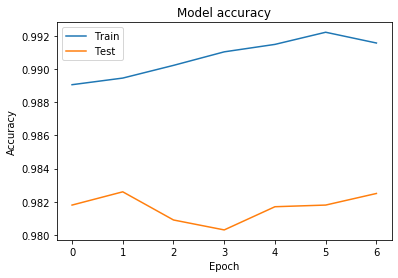

In [60]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()